<a href="https://colab.research.google.com/github/Zedbog/First_repository/blob/master/zadania_mysql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Inizcalizacja środowiska Google Colab
!apt-get install mysql-server > /dev/null
!service mysql start
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'"
!pip -q install PyMySQL

 * Starting MySQL database server mysqld
No directory, logging in with HOME=/
   ...done.
     |████████████████████████████████| 51kB 1.6MB/s 


In [27]:
# zaimporotowanie bibliotek sqlalchemy 
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String

In [28]:
engine = create_engine('mysql+pymysql://root:root@/')

In [29]:
engine.execute('CREATE DATABASE cinematic')
engine.execute('USE cinematic')

ProgrammingError: ignored

In [30]:
eng = create_engine("mysql+pymysql://root:root@/cinematic")
base = declarative_base()

class Directors(base):
  __tablename__ = 'directors'

  director_id = Column(Integer, primary_key=True)
  name = Column(String(30), nullable=False)
  surname = Column(String(30), nullable=False)
  rating = Column(Integer, nullable=False)

  def __repr__(self):
    return f"<Director: id: {self.director_id}, Name: {self.name}, Surname: {self.surname}, Movie_rating: {self.rating}>"

class Movies(base):
  __tablename__ = 'movies'

  movie_id = Column(Integer, primary_key=True)
  title = Column(String(60), nullable=False)
  year = Column(Integer, nullable=False)
  category = Column(String(30), nullable=False)
  director_id = Column(Integer, nullable=False)
  rating = Column(Integer, nullable=False)

  def __repr__(self):
    return f"<Movie: id: {self.movie_id}, Title: {self.title}, Year: {self.year}, Category: {self.category}, Director_id: {self.director_id}, Director_=rating: {self.rating}>"
base.metadata.create_all(eng)

In [31]:
#Utworzenie sesji do wykonywania zapytań
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=eng)
session = Session()

In [32]:
directors = [{'name': 'Frank', 'surname': 'Darabont', 'rating': 7}, {'name':
'Francis Ford', 'surname': 'Coppola', 'rating': 8}, {'name': 'Quentin',
'surname': 'Tarantino', 'rating': 10}, {'name': 'Christopher', 'surname':
'Nolan', 'rating': 9}, {'name': 'David', 'surname': 'Fincher', 'rating': 7}]
movies = [{'title': 'The Shawshank Redemption', 'year': 1994,
'category': 'Drama', 'director_id': 1, 'rating': 8}, {'title': 'The Green Mile',
'year': 1999, 'category': 'Drama', 'director_id': 1, 'rating': 6}, {'title': 'The Godfather', 'year': 1972, 'category': 'Crime', 'director_id': 2, 'rating': 7},
{'title': 'The Godfather III', 'year': 1990, 'category': 'Crime', 'director_id':
2, 'rating': 6}, {'title': 'Pulp Fiction', 'year': 1994, 'category': 'Crime',
'director_id': 3, 'rating': 9}, {'title': 'Inglourious Basterds', 'year': 2009,
'category': 'War', 'director_id': 3, 'rating': 8}, {'title': 'The Dark Knight',
'year': 2008, 'category': 'Action', 'director_id': 4, 'rating': 9}, {'title':
'Interstellar', 'year': 2014, 'category': 'Sci-fi', 'director_id': 4, 'rating': 8},
{'title': 'The Prestige', 'year': 2006, 'category': 'Drama', 'director_id': 4,
'rating': 10}, {'title': 'Fight Club', 'year': 1999, 'category': 'Drama',
'director_id': 5, 'rating': 7}, {'title': 'Zodiac', 'year': 2007, 'category':
'Crime', 'director_id': 5, 'rating': 5}, {'title': 'Seven', 'year': 1995,
'category': 'Drama', 'director_id': 5, 'rating': 8}, {'title': 'Alien 3', 'year':
1992, 'category': 'Horror', 'director_id': 5, 'rating': 5}]

In [33]:
def insert_data(session, base, params):
  session.add(base(**params))
  session.commit()

In [34]:
for director in directors:
  insert_data(session, Directors, director)
for movie in movies:
  insert_data(session, Movies, movie)

In [11]:
for director in session.query(Directors).all():
  print(director) 

<Director: id: 1, Name: Frank, Surname: Darabont, Movie_rating: 7>
<Director: id: 2, Name: Francis Ford, Surname: Coppola, Movie_rating: 8>
<Director: id: 3, Name: Quentin, Surname: Tarantino, Movie_rating: 10>
<Director: id: 4, Name: Christopher, Surname: Nolan, Movie_rating: 9>
<Director: id: 5, Name: David, Surname: Fincher, Movie_rating: 7>


In [13]:
#4. Wypisanie wszystkich filmów z kategorii Drama
for movie in session.query(Movies).filter(Movies.category == 'Drama'):
  print(movie) 

<Movie: id: 1, Title: The Shawshank Redemption, Year: 1994, Category: Drama, Director_id: 1, Director_=rating: 8>
<Movie: id: 2, Title: The Green Mile, Year: 1999, Category: Drama, Director_id: 1, Director_=rating: 6>
<Movie: id: 9, Title: The Prestige, Year: 2006, Category: Drama, Director_id: 4, Director_=rating: 10>
<Movie: id: 10, Title: Fight Club, Year: 1999, Category: Drama, Director_id: 5, Director_=rating: 7>
<Movie: id: 12, Title: Seven, Year: 1995, Category: Drama, Director_id: 5, Director_=rating: 8>


In [14]:
#5. Wypisanie tytułów filmów z kategorii Crime, wyprodukownaych po 1994
for movie in session.query(Movies).filter(Movies.category == 'Crime').filter(Movies.year >= 1994):
  print(movie.title)

Pulp Fiction
Zodiac


In [15]:
""""6. Wypisanie kategorii wszystkich filmów oraz ich ranking dla filmów, 
które zostały wyprodukowane w latach 2000 - 2010 oraz których ranking jest większy niż 7.
sortując po rankingu"""

for movie in session.query(Movies).filter(Movies.year >= 2000).filter(Movies.year <= 2010).filter(Movies.rating >= 7).order_by(Movies.rating.desc()):
  print(f"Movie category: {movie.category}, Rating: {movie.rating}")

Movie category: Drama, Rating: 10
Movie category: Action, Rating: 9
Movie category: War, Rating: 8


In [16]:
""" Wypisz nazwiska wszystkich reżyserów, których ranking jest większy bądź
równy 6, a ich imię zaczyna się na literę 'D' lub kończy się na literę 'n'."""
for director in session.query(Directors).filter(Directors.rating >= 6):
  if (director.name[0] == 'D' or director.name[-1] == 'n'):
    print(director.surname)

Tarantino
Fincher


In [42]:
""" Badanie tabeli za pomocą pandas profiling"""
from pandas_profiling import ProfileReport
import pandas as pd
from pathlib import Path
from ipywidgets import widgets
from google.colab import files

In [ ]:
from sqlalchemy import join
from sqlalchemy.sql import select

j = join(Movies, Directors, Movies.director_id == Directors.director_id)

In [ ]:
conn = eng.connect()
s = select([Movies])
# print(conn.execute(s).fetchall())
for movie in session.query(Movies).all():
  # print(movie)
  session.delete(movie)
for director in session.query(Directors).all():
  session.delete(director)

In [ ]:
for movie in session.query(Movies).all():
  print(movie)
for director in session.query(Directors).all():
    print(director)

In [ ]:
for el in session.query(j).all():
    print(el)

In [68]:
conn = eng.connect()
sql_db = pd.read_sql_query(select([j]),conn)

In [62]:
df = pd.DataFrame(movies)

In [ ]:
import sys
!pip install -U pip
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [70]:
profile = ProfileReport(sql_db, 
                        title = 'Movies',
                        html={'style': {'full_width':True}},
                        sort='None')

In [ ]:
display(sql_db)

In [ ]:
display(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:107: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().')
  (include the error message: '{error}')"""


TypeError: ignored

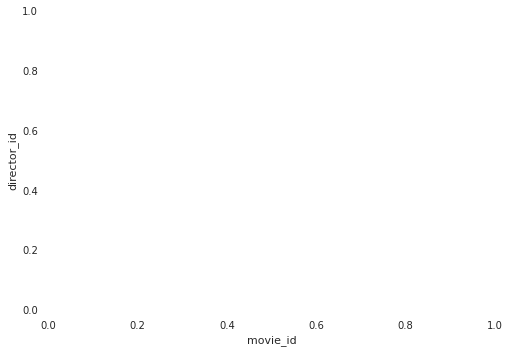

In [71]:
profile.to_file('movies_directors.html')

# files.download('movies.html')

In [ ]:
files.download('movies_directors.html')